In [ ]:
# Data Filter

In [9]:
import data_utils
import matplotlib.pyplot as plt

import shutil
import os

import os
from PIL import Image
from IPython.display import clear_output

import random

In [27]:
# Read all the images in the folder
# Specify the path to your folder

main_folder_path = './ls_data'
filter_folder_path = './filtered_ls_data'
yolo_filtered_split = './yolo_filtered_data'

images_folder_path = main_folder_path + '/images'
shapefiles_folder_path = main_folder_path + '/shape_patches'
yolo_label_folder_path = main_folder_path + '/labels'

filtered_images_folder_path = filter_folder_path + '/images'
filtered_label_folder_path = filter_folder_path + '/labels'


# List all files in the folder
all_files = os.listdir(images_folder_path)

# Filter out only JPG files
just_names = [os.path.splitext(filename)[0] for filename in all_files]

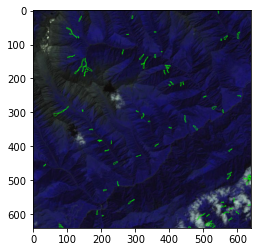

In [ ]:
for just_name in just_names:
    
    clear_output(wait=True)
    
    # If the labels file is empty, ignore file
    if os.path.getsize(yolo_label_folder_path + '/' + just_name + '.txt') == 0:
        continue

    # Get the corresponding labels to print and display
    data_utils.print_labels_on_image_jupyter_notebook(images_folder_path + '/' + just_name + '.jpg', yolo_label_folder_path + '/' + just_name + '.txt')
    plt.show()
    # Get input from user and print it
    user_input = input("Please enter your response: ")
    
    if user_input == 'n':
        print('showing next image')
        
    if user_input == 'y':
        if user_input == 'y':
            # Copying the image
            shutil.copy(images_folder_path + '/' + just_name + '.jpg',filtered_images_folder_path + '/' + just_name + '.jpg')
            # Copying the labels
            shutil.copy(yolo_label_folder_path + '/' + just_name + '.txt', filtered_yolo_label_folder_path + '/' + just_name + '.txt')
    
            
    

## Splitting data into train, test and validation

In [19]:
# List all files in the folder
all_files = os.listdir(filtered_images_folder_path)

# Filter out only JPG files
just_names = [os.path.splitext(filename)[0] for filename in all_files]

In [20]:
print(len(just_names))
total_length = len(just_names)

219


In [21]:
# Shuffle the list to ensure randomness
random.shuffle(just_names)

# Split the list
train = just_names[:int(0.8*total_length)]
val = just_names[int(0.8*total_length):int(0.9*total_length)]
test = just_names[int(0.9*total_length):]

In [16]:
print(len(train))
print(len(val))
print(len(test))



175
22
22


In [31]:
def count_lines_in_file(file_path):
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
        print(len(f.readlines()))
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
        return len(f.readlines())

def total_lines_in_directory(directory_path, file_extension='.txt'):
    total_lines = 0

    for filename in os.listdir(directory_path):
        if filename.endswith(file_extension):
            file_path = os.path.join(directory_path, filename)
            total_lines += count_lines_in_file(file_path)
    return total_lines

directory_path = filtered_label_folder_path  # replace this with the path to your folder
print(total_lines_in_directory(directory_path))

78
20
14
24
49
86
30
33
181
59
139
43
22
64
28
28
23
28
42
63
25
160
17
41
137
14
27
23
37
34
14
61
21
46
35
57
46
39
47
223
29
59
21
50
25
33
28
31
40
27
82
26
28
48
90
20
22
63
39
55
21
100
18
36
47
59
28
73
60
38
59
16
68
152
75
231
25
67
22
23
83
77
109
24
25
44
18
50
10
62
13
36
57
44
51
25
55
16
101
28
145
54
68
46
28
54
51
51
13
30
77
69
26
19
50
21
51
15
51
14
51
54
152
52
55
47
17
125
14
51
67
51
23
28
10
81
58
28
29
73
22
178
33
38
36
28
71
36
31
19
30
31
194
72
21
54
13
51
11
27
72
15
72
151
45
29
16
29
61
33
21
68
48
29
61
37
46
56
46
14
18
71
47
38
18
65
83
55
56
70
25
101
15
110
168
82
22
36
37
24
73
70
32
22
194
16
34
14
27
69
148
18
82
25
42
59
124
122
111
11487


In [23]:
# Move train images and labels
train_folder_image = yolo_filtered_split + '/images/train'
train_folder_label = yolo_filtered_split + '/labels/train'



for just_name in train:
    # Copying the image
    shutil.copy(filtered_images_folder_path + '/' + just_name + '.jpeg',train_folder_image + '/' + just_name + '.jpeg')    
    # Copying the labels
    shutil.copy(filtered_yolo_label_folder_path + '/' + just_name + '.txt',train_folder_label + '/' + just_name + '.txt' )
    

In [24]:
# Repeating for val
val_folder_image = yolo_filtered_split + '/images/val'
val_folder_label = yolo_filtered_split + '/labels/val'


for just_name in val:
    # Copying the image
    shutil.copy(filtered_images_folder_path + '/' + just_name + '.jpeg',val_folder_image + '/' + just_name + '.jpeg')    
    # Copying the labels
    shutil.copy(filtered_yolo_label_folder_path + '/' + just_name + '.txt',val_folder_label + '/' + just_name + '.txt' )
    

In [25]:
# Repeating for test
test_folder_image = yolo_filtered_split + '/images/test'
test_folder_label = yolo_filtered_split + '/labels/test'


for just_name in test:
    # Copying the image
    shutil.copy(filtered_images_folder_path + '/' + just_name + '.jpeg',test_folder_image + '/' + just_name + '.jpeg')    
    # Copying the labels
    shutil.copy(filtered_yolo_label_folder_path + '/' + just_name + '.txt',test_folder_label + '/' + just_name + '.txt' )
    